In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('fast')

from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Input, Embedding, Dense, Flatten, Dropout, concatenate, LSTM
from keras.layers import BatchNormalization, SpatialDropout1D
from keras.callbacks import Callback
from keras.models import Model
from keras.optimizers import Adam

In [2]:
entrenamiento_df = pd.read_csv('dataset_v3')
entrenamiento_df.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,count_families,damage_grade,roof_type_C1,roof_type_C0,...,has_superstructure_cement_mortar_stone_mean,has_superstructure_mud_mortar_brick_mean,has_superstructure_cement_mortar_brick_mean,has_superstructure_timber_mean,has_superstructure_bamboo_mean,has_superstructure_rc_non_engineered_mean,has_superstructure_rc_engineered_mean,has_superstructure_other_mean,area_percentage_norm,height_percentage_norm
0,802906,6,487,12198,2,30,1,3,0,1,...,0.981765,0.931846,0.924732,0.745012,0.914989,0.95741,0.984141,0.985015,0.050505,0.100000
1,28830,8,900,2812,2,10,1,2,0,1,...,0.981765,0.931846,0.924732,0.745012,0.914989,0.95741,0.984141,0.985015,0.070707,0.166667
2,94947,21,363,8973,2,10,1,3,0,1,...,0.981765,0.931846,0.924732,0.745012,0.914989,0.95741,0.984141,0.985015,0.040404,0.100000
3,590882,22,418,10694,2,10,1,2,0,1,...,0.981765,0.931846,0.924732,0.254988,0.085011,0.95741,0.984141,0.985015,0.050505,0.100000
4,201944,11,131,1488,3,30,1,3,0,1,...,0.981765,0.931846,0.924732,0.745012,0.914989,0.95741,0.984141,0.985015,0.070707,0.233333


In [3]:
entrenamiento_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 44 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   building_id                                  260601 non-null  int64  
 1   geo_level_1_id                               260601 non-null  int64  
 2   geo_level_2_id                               260601 non-null  int64  
 3   geo_level_3_id                               260601 non-null  int64  
 4   count_floors_pre_eq                          260601 non-null  int64  
 5   age                                          260601 non-null  int64  
 6   count_families                               260601 non-null  int64  
 7   damage_grade                                 260601 non-null  int64  
 8   roof_type_C1                                 260601 non-null  int64  
 9   roof_type_C0                                 260601 non-nul

In [4]:
test_df = pd.read_csv('encoded_test_values.csv')
test_df.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,position_C0,position_C1,position_C2,plan_configuration_C0,plan_configuration_C1,plan_configuration_C2,plan_configuration_C3,legal_ownership_status_C0,legal_ownership_status_C1,legal_ownership_status_C2
0,300051,17,596,11307,3,20,7,6,t,r,...,0,1,0,1,0,0,0,1,0,0
1,99355,6,141,11987,2,25,13,5,t,r,...,0,1,0,1,0,0,0,1,0,0
2,890251,22,19,10044,2,5,4,5,t,r,...,0,1,0,1,0,0,0,1,0,0
3,745817,26,39,633,1,0,19,3,t,r,...,1,0,0,1,0,0,0,1,0,0
4,421793,17,289,7970,3,15,8,7,t,r,...,1,0,0,1,0,0,0,1,0,0


In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86868 entries, 0 to 86867
Data columns (total 62 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   building_id                             86868 non-null  int64 
 1   geo_level_1_id                          86868 non-null  int64 
 2   geo_level_2_id                          86868 non-null  int64 
 3   geo_level_3_id                          86868 non-null  int64 
 4   count_floors_pre_eq                     86868 non-null  int64 
 5   age                                     86868 non-null  int64 
 6   area_percentage                         86868 non-null  int64 
 7   height_percentage                       86868 non-null  int64 
 8   land_surface_condition                  86868 non-null  object
 9   foundation_type                         86868 non-null  object
 10  roof_type                               86868 non-null  object
 11  gr

In [6]:
test_df = test_df.drop(labels=['land_surface_condition','foundation_type','roof_type',\
'ground_floor_type','other_floor_type','position', 'plan_configuration','legal_ownership_status',\
 'has_secondary_use','has_secondary_use_agriculture','has_secondary_use_hotel','has_secondary_use_rental',\
'has_secondary_use_institution','has_secondary_use_school','has_secondary_use_industry','has_secondary_use_health_post',\
'has_secondary_use_gov_office','has_secondary_use_use_police','has_secondary_use_other'],axis=1)
test_df.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,position_C0,position_C1,position_C2,plan_configuration_C0,plan_configuration_C1,plan_configuration_C2,plan_configuration_C3,legal_ownership_status_C0,legal_ownership_status_C1,legal_ownership_status_C2
0,300051,17,596,11307,3,20,7,6,0,1,...,0,1,0,1,0,0,0,1,0,0
1,99355,6,141,11987,2,25,13,5,0,1,...,0,1,0,1,0,0,0,1,0,0
2,890251,22,19,10044,2,5,4,5,0,1,...,0,1,0,1,0,0,0,1,0,0
3,745817,26,39,633,1,0,19,3,0,0,...,1,0,0,1,0,0,0,1,0,0
4,421793,17,289,7970,3,15,8,7,0,1,...,1,0,0,1,0,0,0,1,0,0


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86868 entries, 0 to 86867
Data columns (total 43 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   building_id                             86868 non-null  int64
 1   geo_level_1_id                          86868 non-null  int64
 2   geo_level_2_id                          86868 non-null  int64
 3   geo_level_3_id                          86868 non-null  int64
 4   count_floors_pre_eq                     86868 non-null  int64
 5   age                                     86868 non-null  int64
 6   area_percentage                         86868 non-null  int64
 7   height_percentage                       86868 non-null  int64
 8   has_superstructure_adobe_mud            86868 non-null  int64
 9   has_superstructure_mud_mortar_stone     86868 non-null  int64
 10  has_superstructure_stone_flag           86868 non-null  int64
 11  has_superstruct

In [8]:
#260601 
#valid_data = entrenamiento_df.drop(["damage_grade"],axis=1)[0:200000]
#valid_target=entrenamiento_df[0:200000]["damage_grade"]
#valid_target.shape


(200000,)

In [9]:
#training_data = entrenamiento_df[200000:260601]
#target_data=entrenamiento_df[200000:260601]["damage_grade"]
#target_data.shape

(60601,)

In [8]:
#Configuraciones genericas
EPOCHS=50
dense_n = 20
cuantos=250
fun_act='sigmoid' #función de activación

In [9]:
## red neuronal de una sola capa sin Embeddings
model0 = Sequential()
model0.add(Dense(dense_n, input_dim=43, activation=fun_act))
model0.add(Dense(1, activation=fun_act))

model0.compile(loss='mean_squared_error', 
              optimizer='adam',
              metrics=['MSE'])

model0.summary()

history=model0.fit(entrenamiento_df.drop(["damage_grade"],axis=1), entrenamiento_df["damage_grade"], epochs=EPOCHS)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                880       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 21        
Total params: 901
Trainable params: 901
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
8144/8144 [==============================] - 90s 5ms/step - loss: 2.1693 - MSE: 2.1693
Epoch 2/50
8144/8144 [==============================] - 36s 4ms/step - loss: 1.9080 - MSE: 1.9080
Epoch 3/50
8144/8144 [==============================] - 35s 4ms/step - loss: 1.9062 - MSE: 1.9062
Epoch 4/50
8144/8144 [==============================] - 37s 5ms/step - loss: 1.9108 - MSE: 1.9108
Epoch 5/50
8144/8144 [==============================] - 38s 5ms/step - loss: 1.9078 - MSE: 1.9078
Epoch 6/50
8144/8144 [========

In [14]:

valid_data = entrenamiento_df.drop(["damage_grade"],axis=1)[0:200000]
valid_target=entrenamiento_df[0:200000]["damage_grade"]
valid_target.shape

(200000,)

In [15]:
training_data = entrenamiento_df.drop(["damage_grade"],axis=1)[200000:260601]
target_data=entrenamiento_df[200000:260601]["damage_grade"]
target_data.shape

(60601,)

In [12]:
# evaluamos el modelo
scores = model0.evaluate(entrenamiento_df.drop(["damage_grade"],axis=1), entrenamiento_df["damage_grade"])
print("\n%s: %.4f" % (model0.metrics_names[1], scores[1]))

8144/8144 [==============================] - 34s 4ms/step - loss: 1.9076 - MSE: 1.9076

MSE: 1.9076


In [16]:
# evaluamos el modelo
scores = model0.evaluate(training_data, target_data)
print("\n%s: %.4f" % (model0.metrics_names[1], scores[1]))

scores = model0.evaluate(valid_data, valid_target)
print("\n%s: %.4f" % (model0.metrics_names[1], scores[1]))

1894/1894 [==============================] - 8s 4ms/step - loss: 1.9063 - MSE: 1.9063

MSE: 1.9063
6250/6250 [==============================] - 36s 6ms/step - loss: 1.9080 - MSE: 1.9080

MSE: 1.9080


In [22]:
results=model0.predict(test_df)
results

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [23]:
submit = pd.read_csv('submission_format.csv', index_col='building_id')
submission = pd.DataFrame(
    data=results,
    columns=submit.columns,
    index=submit.index
)
submission.head()

,damage_grade
building_id,
300051,1.0
99355,1.0
890251,1.0
745817,1.0
421793,1.0


In [27]:
submission["damage_grade"] = submission["damage_grade"].astype(int)
submission.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86868 entries, 300051 to 501372
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   damage_grade  86868 non-null  int32
dtypes: int32(1)
memory usage: 1018.0 KB


In [28]:
submission.head()

,damage_grade
building_id,
300051,1
99355,1
890251,1
745817,1
421793,1


In [29]:
submission.to_csv('submit/submission_RedNeuronal_1_capa.csv')

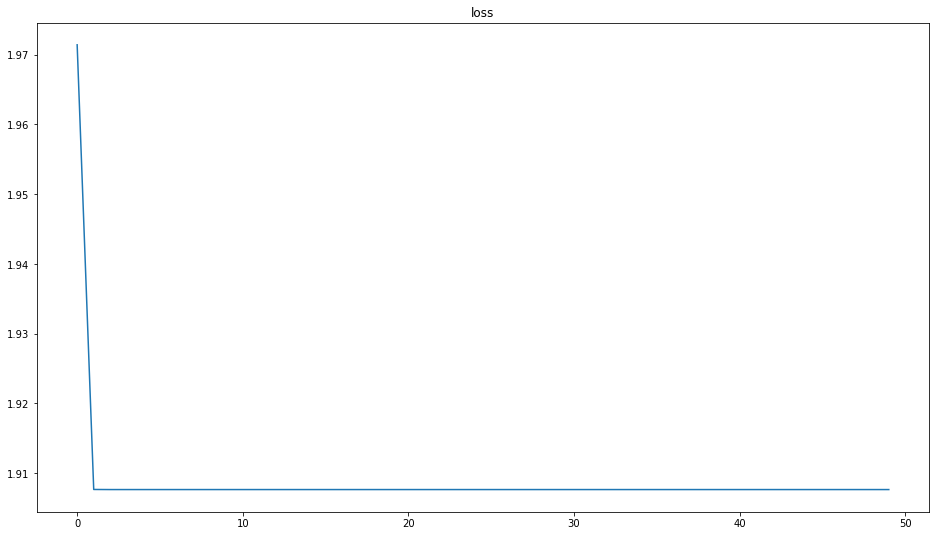

In [21]:
plt.plot(history.history['loss'])
plt.title('loss')
#plt.plot(history.history['mean_squared_error'])
#plt.title('validate loss')
plt.show()